### 🧾 Overview

This project aims to segment customers based on three key features: `Age`, `Annual Income (k$)`, and `Spending Score (1–100)`. By applying clustering techniques, we seek to uncover meaningful customer groups that can guide targeted marketing and business strategies.

###  Feature Description

- **Age**: The age of the customer.
- **Annual Income (k$)**: The yearly income in thousands of dollars.
- **Spending Score (1–100)**: A score assigned by the shopping center based on customer spending behavior and purchasing patterns.

###  Initial Observations

- The dataset shows a diverse range of ages, income levels, and spending behaviors.
- Some customers earn high income but spend little, while others are young with low income but high spending activity.


### Import Libraries

In [2]:
pip install pandas matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Display setting for pandas
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

###  Dataset Preview


In [4]:
# Load the dataset
df = pd.read_csv("../data/Mall_Customers.csv")

# Preview
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Exploratory Data Analysis

# Shape
print(f"Dataset shape: {df.shape}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic stats
df.describe()


Dataset shape: (200, 5)

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


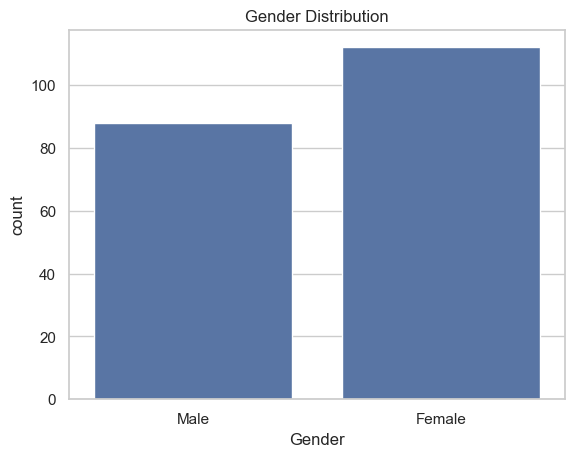

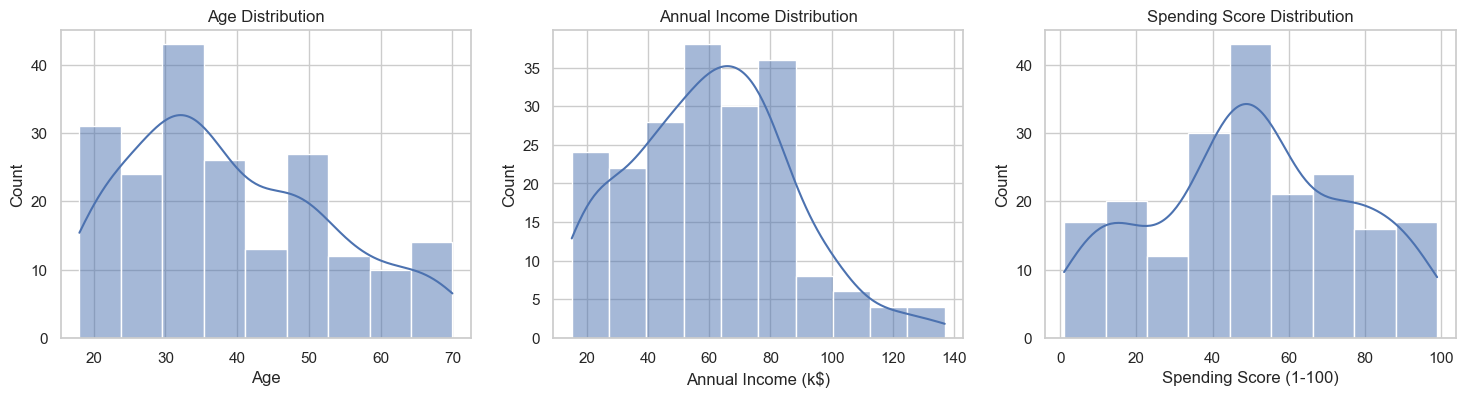

In [6]:
# Gender count
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Age, Income, Spending
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
axes[1].set_title("Annual Income Distribution")
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])
axes[2].set_title("Spending Score Distribution")
plt.show()


### Elbow Method

To find the optimal number of clusters (K) for K-Means, we applied the **Elbow Method**. This technique involves plotting the total within-cluster sum of square errors (SSE or inertia) against the number of clusters.

As shown in the plot below, the SSE decreases rapidly at first and then starts to level off. The "elbow point" is the value of K where adding more clusters yields diminishing returns in reducing the SSE.

###  Result Interpretation

- The curve begins to flatten around **K = 5**, indicating that 5 clusters capture most of the structure in the data.
- Beyond K = 5, the reduction in SSE becomes marginal, suggesting potential overfitting if more clusters are added.

> **Conclusion**: We selected **K = 5** as the optimal number of clusters for this analysis.


In [32]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


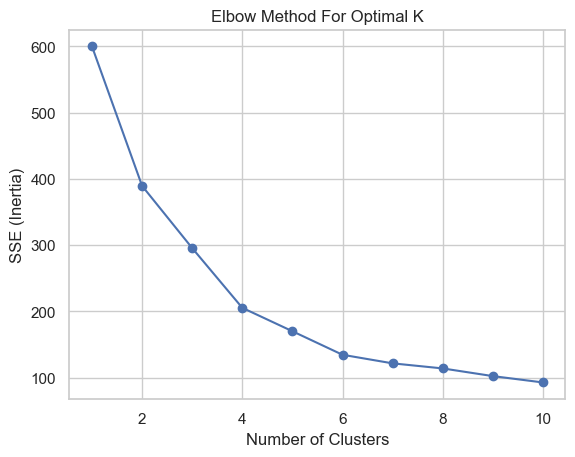

In [8]:
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method For Optimal K")
plt.show()


### Why PCA?

To visualize the high-dimensional clustering results, we used **Principal Component Analysis (PCA)** to reduce the 3D feature space (`Age`, `Annual Income`, `Spending Score`) into 2D. This allows us to observe the spatial distribution and separability of clusters.

### Result Interpretation

The scatter plot below shows the five clusters in the space of the first two principal components. Each dot represents a customer, colored by their assigned cluster.

- Most clusters appear well-separated, indicating that the KMeans algorithm has found distinguishable groups.
- Some clusters have slight overlap, which is expected since we are reducing 3D data into 2D.

>  **Conclusion**: The PCA visualization confirms that the clustering results are meaningful and exhibit good separation between customer segments.


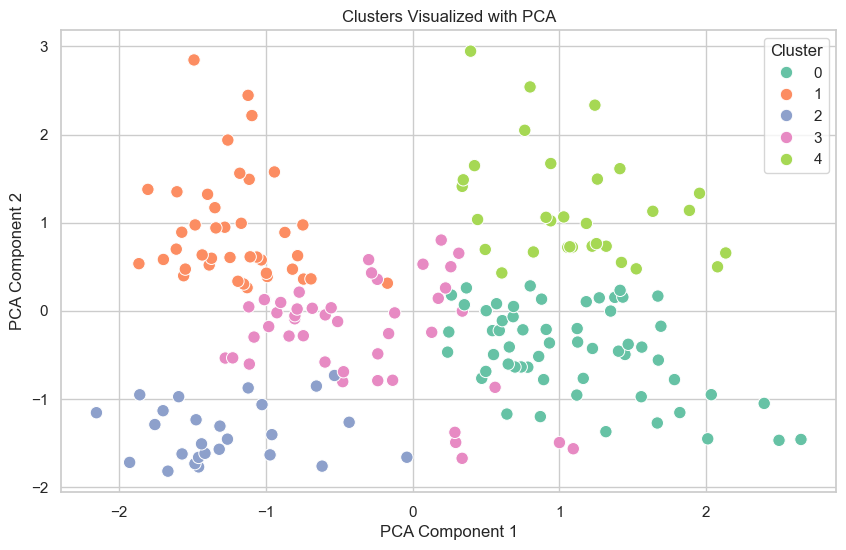

In [33]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clustering result
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2', s=80)
plt.title("Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### Final Clustering with K = 5

After identifying the optimal number of clusters as 5, we fit the final KMeans model to the standardized data. The resulting cluster labels were then added to the original DataFrame for further analysis and visualization.

### 2D Visualization: Income vs. Spending Score

To understand the distribution of clusters in terms of consumer behavior, we plotted the clusters using two key features:

- **X-axis**: Annual Income (k$)
- **Y-axis**: Spending Score (1–100)

This visualization provides intuitive insight into how income and spending relate across customer groups.

### Insights:

- One cluster represents **high-income, low-spending** customers (possibly frugal or selective).
- Another group shows **low-income but high-spending** behavior (possibly students or impulsive buyers).
- There's a distinct **high-income, high-spending** segment—ideal for luxury marketing.

> **Conclusion**: The clusters are not only statistically meaningful but also align well with real-world customer behavior patterns.


In [34]:
# Fit final KMeans model with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = kmeans.labels_

# Preview
df[['CustomerID', 'Cluster']].head()

,CustomerID,Cluster
0,1,2
1,2,2
2,3,3
3,4,2
4,5,2


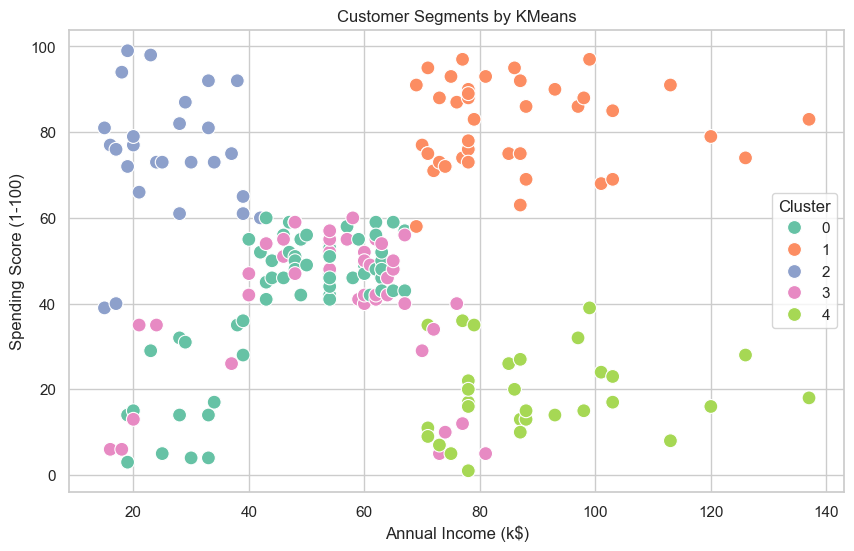

In [28]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=100
)
plt.title("Customer Segments by KMeans")
plt.legend(title='Cluster')
plt.show()



### Key Insights:

- **Cluster 0**: Older customers with moderate income and spending.
- **Cluster 1**: Middle-aged, high-income, high-spending segment—ideal for premium marketing.
- **Cluster 2**: Young, low-income but high-spending—possibly impulsive buyers or students.
- **Cluster 3**: Young, mid-income, low-spending—budget-conscious or conservative.
- **Cluster 4**: Older, high-income, low-spending—wealthy but cautious spenders.

---

### Age Distribution by Cluster

We visualized the distribution of age within each cluster using a boxplot. This helps reveal the age range and variability among different customer segments.

- **Cluster 0** has the highest median and widest age range.
- **Cluster 2** and **Cluster 3** have younger populations.
- **Cluster 4** shows a slightly older group with narrower variation.

>  Age can be a key demographic factor influencing spending behavior, which aligns with observed trends in this segmentation.


In [30]:
# Analyze customer segments
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.3,47.6,41.7
1,32.9,86.1,81.5
2,25.8,26.1,74.8
3,26.7,54.3,40.9
4,44.4,89.8,18.5


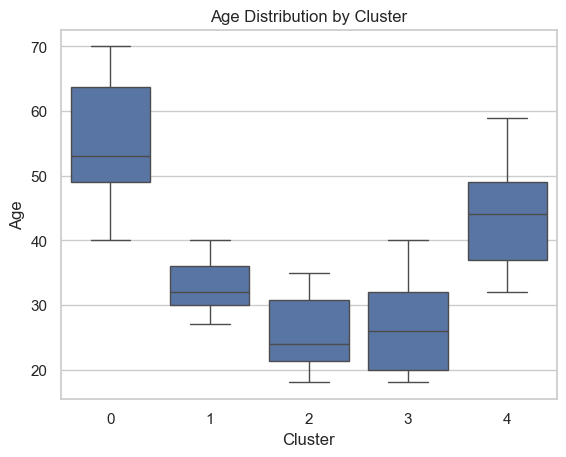

In [31]:
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title("Age Distribution by Cluster")
plt.show()
